# Analysis: Airline delays in the U.S.

In [1]:
# data processing
import pandas as pd
import time

start_time = time.time()

In [2]:
# Load file (this machine can't handle more)
df = pd.read_csv("input/2009.csv")

In [3]:
# Let's get familiar with the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429338 entries, 0 to 6429337
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [4]:
# 7.2M records and 28 columns
# We have (technical) data on airlines, airport, flight number, etc
# Pretty much all other data is time-related (in minutes)

In [5]:
# Set to see all columns
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check unique values in OP_CARRIER (airline) column
df.OP_CARRIER.unique()

array(['XE', 'YV', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'EV', 'F9', 'FL',
       'HA', 'MQ', '9E', 'AA', 'AS', 'B6', 'CO', 'DL'], dtype=object)

In [8]:
# Renaming airline codes to company names
# Source: https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States

df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

In [9]:
# Quality check
df.OP_CARRIER.unique()

array(['XE', 'Mesa Airline', 'NW', 'PSA Airlines', 'SkyWest Airlines',
       'United Airlines', 'US', 'Southwest Airlines', 'ExpressJet',
       'Frontier Airlines', 'FL', 'Hawaiian Airlines', 'Envoy Air',
       'Endeavor Air', 'American Airlines', 'Alaska Airlines',
       'JetBlue Airways', 'CO', 'Delta Airlines'], dtype=object)

# Canceled flights exploration

In [10]:
# Total number of canceled flights
df.CANCELLED.sum()

87038.0

In [11]:
# Let's explore column CANCELLED
df.CANCELLED.unique()

array([0., 1.])

In [12]:
# From above we see it's binary: 0 or 1, let's see how it looks like
canceled = df[(df['CANCELLED'] > 0)]

In [13]:
canceled.head(3)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
879,2009-01-01,Mesa Airline,7104,DEN,CPR,2150,NaN,NaN,NaN,NaN,NaN,NaN,2312,NaN,NaN,1.0,A,0.0,82.0,NaN,NaN,230.0,NaN,NaN,NaN,NaN,NaN,NaN
926,2009-01-01,Mesa Airline,7329,DTW,ORD,1857,NaN,NaN,NaN,NaN,NaN,NaN,1914,NaN,NaN,1.0,A,0.0,77.0,NaN,NaN,235.0,NaN,NaN,NaN,NaN,NaN,NaN
935,2009-01-01,Mesa Airline,7065,EWR,IAD,1013,NaN,NaN,NaN,NaN,NaN,NaN,1139,NaN,NaN,1.0,A,0.0,86.0,NaN,NaN,213.0,NaN,NaN,NaN,NaN,NaN,NaN


# Conclusion
- Canceled flights are not delayed flights
- If canceled, the flight didn't happen, and values are NaN
- We can filter out Canceled Flights for out analysis
- DEP_DELAY Actual Departure Time
- ARR_DELAY Total Delay on Arrival in minutes
- If both of these numbers are negative =>> there was no delay

In [14]:
# OPTIONAL: Leaving only non-canceled flights
# df = df[(df['CANCELLED'] == 0)]

# Departure delay and Arrival delay exploration

In [15]:
# Departure delay data (in minutes)
df.DEP_DELAY.head()

0    -2.0
1    -1.0
2    -1.0
3     9.0
4   -10.0
Name: DEP_DELAY, dtype: float64

In [16]:
# Arrival delay data (in minutes)
df.ARR_DELAY.head()

0     4.0
1    -8.0
2    -9.0
3   -12.0
4   -38.0
Name: ARR_DELAY, dtype: float64

- If a number is positive = flight delayed
- Since that we're exploring only delayed flights, non-delayed should be disregarded
- The danger of keeping those is if we summarise for plotting for example, we'll get false data
- Sum of Delayed minutes will be less because of the negative numbers that will subtract the real delays
- BUT
- Let's first define what a delayed flight is:
- A Delayed flight is a flight that arrives late at its destination
- Flight can be delayed on departure but still, arrive on time = not a delayed flight

In [17]:
# To do this analysis right, let's filter all negative numbers in ARR_DELAY column
# Number of delayed flights 
df[df.ARR_DELAY > 0 ].count()

FL_DATE                2402990
OP_CARRIER             2402990
OP_CARRIER_FL_NUM      2402990
ORIGIN                 2402990
DEST                   2402990
CRS_DEP_TIME           2402990
DEP_TIME               2402990
DEP_DELAY              2402990
TAXI_OUT               2402990
WHEELS_OFF             2402990
WHEELS_ON              2402990
TAXI_IN                2402990
CRS_ARR_TIME           2402990
ARR_TIME               2402990
ARR_DELAY              2402990
CANCELLED              2402990
CANCELLATION_CODE            0
DIVERTED               2402990
CRS_ELAPSED_TIME       2402990
ACTUAL_ELAPSED_TIME    2402990
AIR_TIME               2402990
DISTANCE               2402990
CARRIER_DELAY          1170501
WEATHER_DELAY          1170501
NAS_DELAY              1170501
SECURITY_DELAY         1170501
LATE_AIRCRAFT_DELAY    1170501
Unnamed: 27                  0
dtype: int64

In [18]:
# Filter out non-delayed flights < 0 DEP_DELAY
df = df[(df['ARR_DELAY'] > 0)]

In [19]:
# Minutes to hours 
df['ARR_DELAY'] = df['ARR_DELAY'] / 60

# Minutes to hours 
df['DEP_DELAY'] = df['DEP_DELAY'] / 60

In [20]:
# Down from 7.2 to 2.5 million (relevant) records
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402990 entries, 0 to 6429335
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

# DateTime data manipulation

In [21]:
# Check if FL_DATE is DateTime type
type(df['FL_DATE'])

pandas.core.series.Series

In [22]:
# Convert string to DateTime
pd.to_datetime(df.FL_DATE)

0         2009-01-01
15        2009-01-01
17        2009-01-01
24        2009-01-01
25        2009-01-01
             ...    
6429323   2009-12-31
6429328   2009-12-31
6429329   2009-12-31
6429331   2009-12-31
6429335   2009-12-31
Name: FL_DATE, Length: 2402990, dtype: datetime64[ns]

In [23]:
# Month variable
df['FL_DATE_month'] = pd.to_datetime(df['FL_DATE']).dt.month
# Weekday variable
df['FL_DATE_weekday'] = pd.to_datetime(df['FL_DATE']).dt.day_name()

# Data Visualisation

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Arrival and departure delays by month of the year

In [25]:
df.groupby('FL_DATE_month').ARR_DELAY.sum()

FL_DATE_month
1     104447.483333
2      77648.733333
3     109855.750000
4     112241.983333
5      98350.100000
6     132472.616667
7     126704.400000
8     111145.533333
9     130249.033333
11     51678.450000
12    132804.433333
Name: ARR_DELAY, dtype: float64

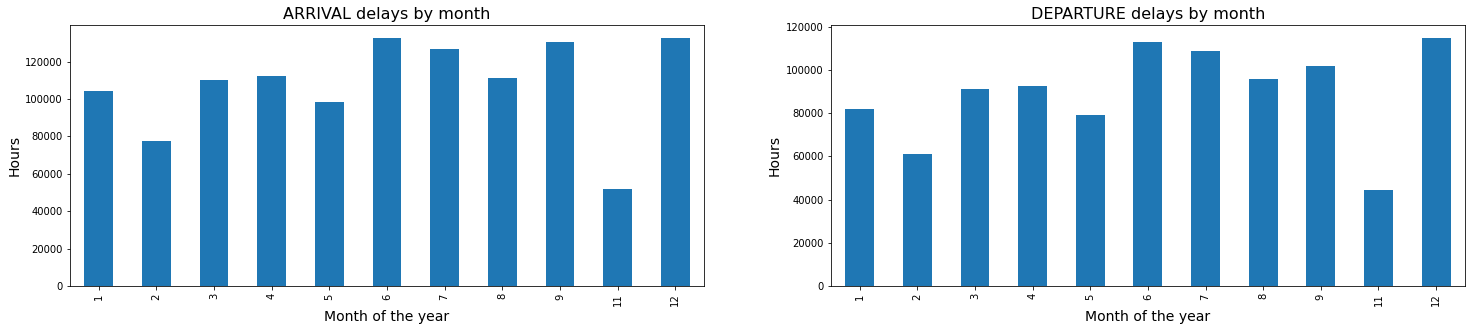

In [26]:
# Arrival and departure delays by month of the year
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
df.groupby('FL_DATE_month').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('ARRIVAL delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('FL_DATE_month').DEP_DELAY.sum().plot.bar()
plt.title('DEPARTURE delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()

# Delays by airlines

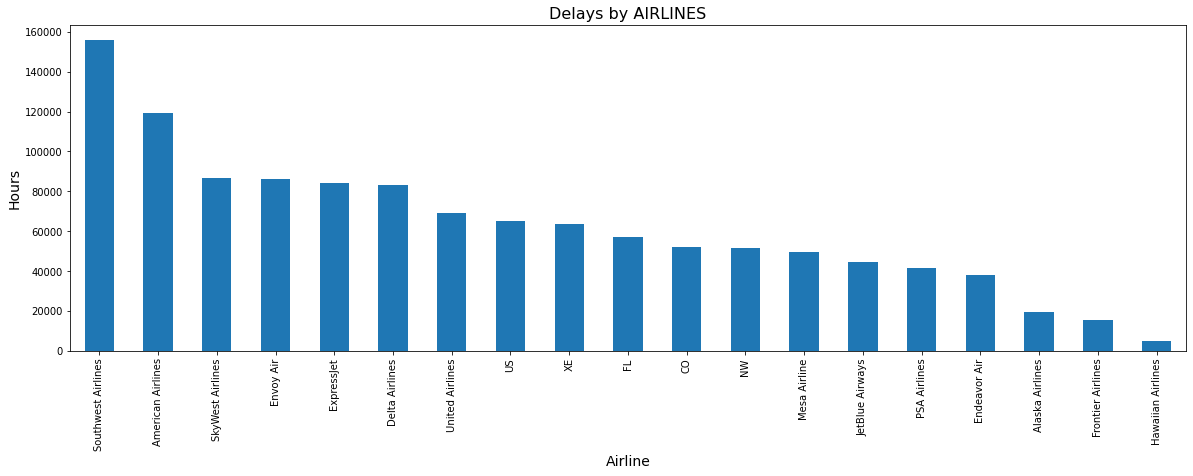

In [27]:
# Delays by airlines
plt.figure(figsize=(20, 6))
df.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

# Delays by City

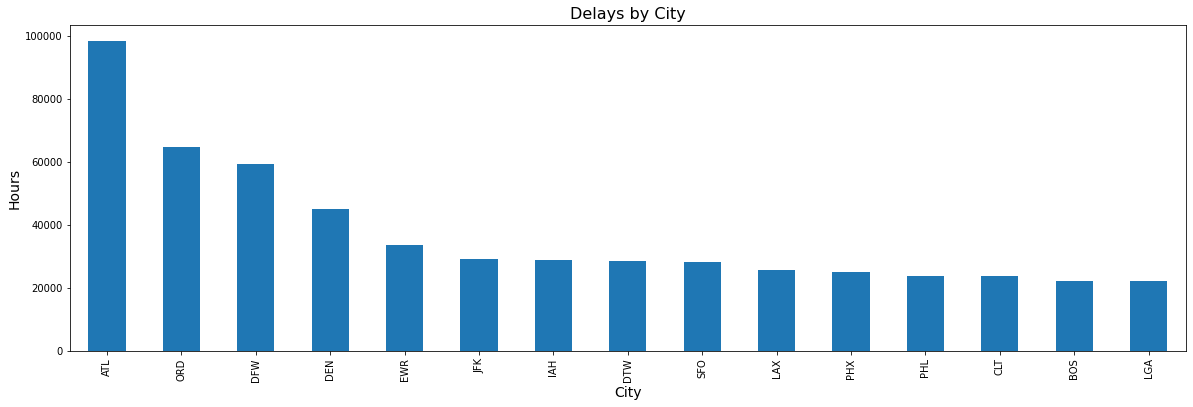

In [28]:
# Delays by City
city_by_delay = df.groupby('ORIGIN').ARR_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('Delays by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

In [29]:
end_time = time.time()
print(f"Total time: {end_time-start_time} s")

Total time: 36.16184210777283 s
